# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### 1. Is the distribution of body temperatures normal?

Based on this histogram of the body temperature values, you could say that these values are more or less normally distributed. They have a mean around 98 and the graph resembles the standard bell curve.

(array([ 4.,  6., 15., 26., 30., 30., 15.,  1.,  2.,  1.]),
 array([ 96.3 ,  96.75,  97.2 ,  97.65,  98.1 ,  98.55,  99.  ,  99.45,
         99.9 , 100.35, 100.8 ]),
 <a list of 10 Patch objects>)

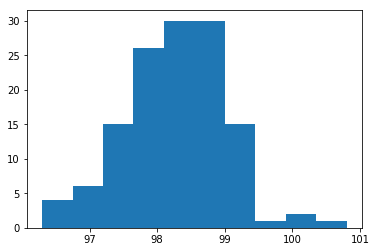

In [3]:
# histogram of body temperature
plt.hist(df['temperature'])

### 2. Is the sample size large? Are the observations independent?

With 130 observations in this data set, we can consider this sample size relatively large ($ \ge 30 $). The observations are independent because none of the observations influence the others - they are all recorded separately and without referencing another data point.

In [4]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


### 3. Is the true population mean really 98.6 degrees F?

After resampling 1000 times and recording the mean of each result, it seems like the mean actually lies closer to 98.2. I think in this case, it is best to use a one-sample test to compare resampled data to the single value of 98.6. If we work with "98.6 is the true population mean" as our Null Hypothesis, our testing is more clear. In this one-sample test, I calculated the difference of the resampled means from 98.6 and checked how many of them were smaller than the observed difference of about -0.41 (taken from the bootstrap sampled data). A p_value this high tells me that it is very likely that the true mean should actually lie below 98.6, since most of our resampled data is down there as well. There are probably enough data points in this example to use $z$ statistic to compare the resampled data to the mean, as well as find the standard deviation of the original data set.

In [17]:
# create empty array for storing bootstrap means
df_means = np.empty(1000)
# duplicate dataframe
df_bs = df.copy()

# perform 1000 resamplings, save the Temperature means in df_means
for i in range(1000) :
    bs_sample = np.random.choice(df['temperature'], size=130)
    df_bs['temperature'] = bs_sample
    df_means[i] = np.mean(df_bs['temperature'])

In [6]:
# print mean of all the sample means
np.mean(df_means)

98.24464076923077

In [7]:
# define a few functions

def bootstrap_replicate_1d(data, func):
    """Create bootstrap sample of 1d data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)  
    return bs_replicates

def diff_from_mean(data, mean=98.6):
    return np.mean(data) - mean

In [9]:
# one-sample test
# generate bs reps
bs_replicates = draw_bs_reps(df_bs['temperature'], diff_from_mean, 1000)

# save the difference of the sampled means from the "true" mean of 98.6
# -0.3512
diff_obs = np.mean(df_means) - 98.6

# get p value for these resampled data
p_value = np.sum(bs_replicates <= diff_obs) / 1000
p_value

0.723

### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests. 

With as much data as we have available, it is probably better to use the z-score statistic when looking at the entire dataset. Generally, using a smaller data set we could use the t-score to see how data points relate internally, but since we have the entire parent data set here, I would still use the z-score when taking a sample of 10 data points.

Since the t-score divides by the square root of the sample size, a smaller sample size will heavily influence the calculations.  The t-score certainly has its place for getting a feel of the data and how it is distributed, but in a case like this one where we have plenty of surrounding context, it makes more sense to use the z-score.

In [11]:
# take a sample of 10 data points
sample = np.random.choice(df['temperature'], size=10)

# z scores of sample using entire data set
z_score = (sample - np.mean(df['temperature'])) / np.std(df['temperature'])

# t score of sample using only sample
t_score = (sample - np.mean(sample)) / (np.std(sample) / np.sqrt(10))

# print results
print("z_score: ", z_score, "\nt_score: ", t_score)

z_score:  [-1.02584075  0.61718961  0.06951282 -0.06740637  0.06951282  0.48027041
 -0.61508316 -1.16275994  0.7541088   1.0279472 ] 
t_score:  [-4.63897825  2.68572425  0.24415675 -0.36623513  0.24415675  2.07533238
 -2.80780263 -5.24937013  3.29611613  4.51689988]


### 5. At what temperature should we consider someone's temperature to be "abnormal"?

If we take a look at the percentile range, 96.7225 is at the 2.5 percentile and 99.4775 is at the 97.5 percentile. Judging by the data alone, we would identify anything lower or higher than those to be abnormal. Of course, there is some flexibility in these numbers in a medical sense, but it is still interesting to see the variability during a study.

In [12]:
np.percentile(df['temperature'], [2.5, 97.5])

array([96.7225, 99.4775])

### 6. Is there a significant difference between males and females in normal temperature?

After plotting the data and checking the mean, median, and st.dev. of both males and females, it seems females are just a tad bit higher on average, with a slightly larger range as well. Overall, I would say that the data suggests that females experience slightly higher body temperatures, and even faster heart rates.

In [16]:
print("Male Temp. Mean: ", np.mean(df_male['temperature']), "Male Temp. St. Dev.: ", np.std(df_male['temperature']), 
      "Male Temp. Median: ", np.median(df_male['temperature']),
      "\nFemale Temp. Mean: ", np.mean(df_female['temperature']), "Female Temp. St. Dev.: ", np.std(df_female['temperature']),
      "Female Temp. Median: ", np.median(df_female['temperature']))

Male Temp. Mean:  98.1046153846154 Male Temp. St. Dev.:  0.6933598841828696 Male Temp. Median:  98.1 
Female Temp. Mean:  98.39384615384613 Female Temp. St. Dev.:  0.7377464486428966 Female Temp. Median:  98.4


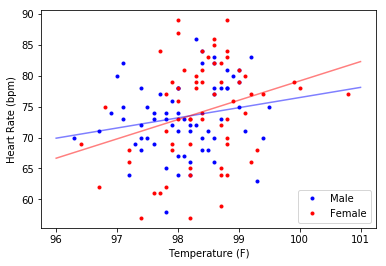

In [13]:
# split up data by gender
df_male = df[df['gender']=='M']
df_female = df[df['gender']=='F']

# prepare for creating best fit lines
temps = [96, 97, 98, 99, 100, 101]
male_line = np.empty(6)
female_line = np.empty(6)

# find slope and intercept for male and female data
slope_male, intercept_male = np.polyfit(df_male['temperature'], df_male['heart_rate'], 1)
slope_female, intercept_female = np.polyfit(df_female['temperature'], df_female['heart_rate'], 1)

# create y values for temps in range 96 - 101
for i in range(6):
    male_line[i] = (slope_male * temps[i]) + intercept_male
    female_line[i] = (slope_female * temps[i]) + intercept_female

# plot both males and females on same plot
_ = plt.plot(df_male['temperature'], df_male['heart_rate'], color='blue', marker='.', linestyle='none')
_ = plt.plot(df_female['temperature'], df_female['heart_rate'], color='red', marker='.', linestyle='none')

# plot best fit lines
_ = plt.plot(temps, male_line, color='blue', alpha=0.5)
_ = plt.plot(temps, female_line, color='red', alpha=0.5)

# label axes
plt.legend(('Male', 'Female'), loc='lower right')
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('Heart Rate (bpm)')